<a href="https://colab.research.google.com/github/Harshit-Raj-2000/classifying-newswires-multiclass-classification/blob/main/newswires_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
#just a way to get backk the text from the sequence of numbers
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
train_labels[10]

557056/550378 [==============================] - 0s 0us/step


3

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [7]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [8]:
# the to_one_hot function is same as the built in to_categorical function
#
#form keras.utils.np_utils import to_categorical
#
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

In [9]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs=20,batch_size=512,validation_data=(x_val,y_val))

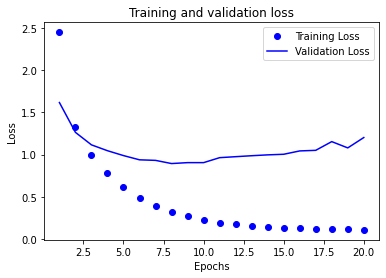

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

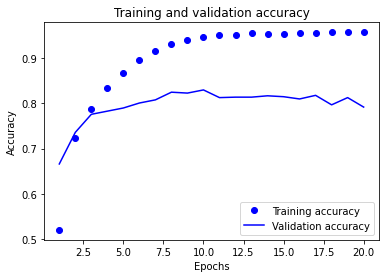

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 56ms/step - loss: 3.1680 - accuracy: 0.3813 - val_loss: 1.7634 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.5456 - accuracy: 0.6918 - val_loss: 1.3273 - val_accuracy: 0.6930
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.1304 - accuracy: 0.7540 - val_loss: 1.1307 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8699 - accuracy: 0.8127 - val_loss: 1.0259 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6536 - accuracy: 0.8619 - val_loss: 0.9563 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5221 - accuracy: 0.8947 - val_loss: 0.9138 - val_accuracy: 0.8170
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.4220 - accuracy: 0.9131 - val_loss: 0.9301 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [42]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 3ms/step - loss: 1.0101 - accuracy: 0.7823


[1.0100523233413696, 0.7822796106338501]

In [24]:
predictions = model.predict(x_test)